# Example of reading in ROOT files using uproot

Reference: https://uproot.readthedocs.io/en/latest/basic.html

In [1]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Your uproot version: ", uproot.__version__)

Your uproot version:  4.1.3


Open a ROOT file by providing the file path. This is a raw data of unprocessed waveforms.

In [3]:
f = uproot.open('../data/test_led_1kHz_bt_p14_p15_1800V_220615T1742.root')

Inspect this ROOT File

Notes: uproot read in root file object as dictionary. Dictionary maps keys to data. keys can be either string, integer, or float. Data can have simple or complicated data structure. For example, `daq` is a key, and the data it points to is a `TTree` data type.

In [4]:
f.classnames()

{'daq;1': 'TTree', 'run_info;1': 'TTree'}

`TTree` data type is the conventional way to store large amount of data. It's like a table, each row is what we call a entry. An entry can have many variables. `TTree::Show()` function print the tree structure. 

- `i4` is int32
- `u2` is uint16
- `u4` is uint32


In [5]:
t = f['daq']
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nadc                 | int32_t                  | AsDtype('>i4')
adc_b1_ch14          | uint16_t[]               | AsJagged(AsDtype('>u2'))
adc_b1_ch15          | uint16_t[]               | AsJagged(AsDtype('>u2'))
event_id             | uint32_t                 | AsDtype('>u4')
event_ttt            | uint32_t                 | AsDtype('>u4')


There are various ways to convert the data. I personally prefer converting them into `numpy`. See documentation for other library options. Alternatively one can use `arrays` to read multiple variables out at once.

In [6]:
adc_b1_ch14 = t['adc_b1_ch14'].array(library='np')
event_id = t['event_id'].array(library='np')

In [7]:
print("the first entry:")
print('event_id[0]=',event_id[0])
print('adc_b1_ch14[0]=', adc_b1_ch14[0])

the first entry:
event_id[0]= 103880
adc_b1_ch14[0]= [8088 8087 8087 8086 8089 8082 8090 8086 8088 8090 8093 8089 8087 8087
 8086 8087 8089 8094 8087 8080 8091 8088 8086 8091 8086 8091 8086 8089
 8076 8083 8088 8081 8088 8092 8088 8083 8090 8084 8088 8092 8090 8091
 8089 8089 8081 8081 8083 8087 8086 8089 8092 8079 8085 8088 8082 8084
 8082 8084 8089 8088 8088 8088 8078 8088 8077 8086 8080 8086 8086 8086
 8087 8089 8086 8085 8086 8084 8085 8084 8087 8089 8083 8091 8085 8087
 8079 8086 8081 8083 8090 8088 8086 8091 8086 8085 8091 8083 8081 8088
 8093 8091 8087 8087 8087 8089 8086 8093 8088 8085 8092 8092 8082 8089
 8087 8087 8083 8082 8089 8088 8094 8093 8086 8089 8086 8084 8088 8086
 8086 8084 8091 8093 8087 8088 8091 8090 8086 8088 8087 8085 8085 8086
 8084 8087 8089 8085 8081 8084 8087 8088 8086 8089 8081 8086 8088 8089
 8086 8085 8095 8086 8087 8083 8089 8094 8089 8082 8086 8088 8087 8086
 8096 8095 8091 8089 8088 8083 8094 8082 8086 8091 8088 8095 8087 8093
 8096 8091 8092 8091 808

plotting is possible via matplotlib 

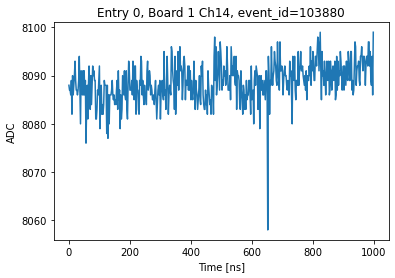

In [9]:
# our V1730 digitizer is sampling at 500 MHz. So each sample is 2 ns.
n_samples = len(adc_b1_ch14[0]) # number of samples
t = np.arange(0, n_samples*2, 2) # time axis
plt.plot(t, adc_b1_ch14[0])

# add title and axis labels
title_str = "Entry 0, Board 1 Ch14, event_id=%d" % event_id[0]
plt.title(title_str)
plt.ylabel('ADC')
plt.xlabel('Time [ns]')
plt.show()